In [1]:
import pandas as pd
df = pd.read_csv('Wholesale.csv')
df.head(3)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844


In [2]:
df.isnull().any()


Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [45]:
df = df.drop(['Channel','Region'], axis=1)

In [46]:
from sklearn.preprocessing import StandardScaler
sc_model = StandardScaler()
sc_df = pd.DataFrame(sc_model.fit_transform(df), columns=df.columns)
sc_df.head(2)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151


In [47]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 3, random_state = 0)
model.fit (sc_df)
sc_df['cluster'] = model.labels_
sc_df.head(3)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,2
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,2
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,2


In [48]:
sc_df.groupby('cluster').mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster,,,,,,
0,1.523225,-0.136629,-0.245823,1.038595,-0.409281,0.305114
1,-0.242638,1.943918,2.138295,-0.042127,2.076593,0.646200
2,-0.305934,-0.247152,-0.250504,-0.226214,-0.205140,-0.160539


<Axes: xlabel='cluster'>

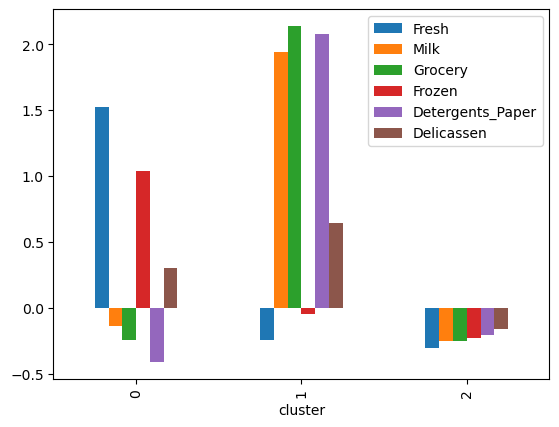

In [49]:
%matplotlib inline
cluster_mean = sc_df.groupby('cluster').mean()
cluster_mean.plot(kind = 'bar')

<Axes: >

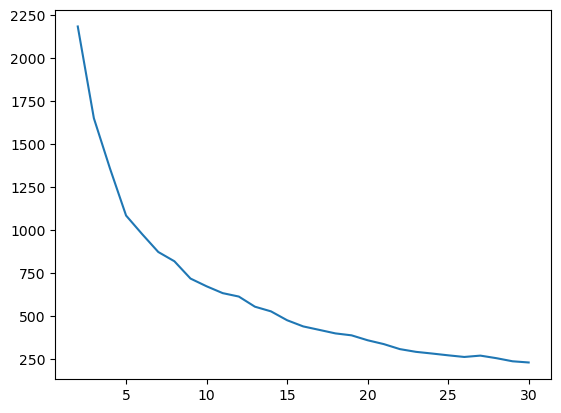

In [50]:
sse_list = []
for n in range(2, 31):
    model = KMeans(n_clusters = n, random_state = 0)
    model.fit (sc_df)
    sse = model.inertia_
    sse_list.append(sse)
se = pd.Series(sse_list, index=range(2, 31))
se.plot(kind='line')

In [52]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 5, random_state = 0)
model.fit (sc_df)
sc_df['cluster'] = model.labels_
sc_df.to_csv('clustered_Wholesale.csv', index=False)